## Project 2: Analysis of Dataset involving Hypotheses

Project 2 2018 Earnings report data set is free and acquired from https://data.boston.gov/dataset/employee-earnings-report

Each year, the city of Boston develops a report and dataset containing information on the average earnings per department for each city department. They analyze several dependent and independent variables such as each employee's name, the department they work for, job title, regular salary, overtime salary, injury salary, educative salary, and total earnings. The City of Boston develops these reports and datasets annually in order to monitor and manage the budget the city maintains in order to pay for its' city employees. It is crucial to analyze this data set and these specific variables to analyze how average annual salaries earned and average total earnings per department has changed each year. Although in my analysis, I am only focusing on the 2018 dataset. 

The 2018 Earnings Report dataset is legal and free accessed through the website linked above. 

In this analysis, I will be using hypothesis testing to see which department has the largest average salary earned in 2018. Using the 2018 dataset,  first I hypothesize that the Boston City Council department earns the most in 2018 while all the Boston Public School department earns the least in 2018. Second, I also hypothesize that Boston Police Department earns the most injury compensation than the Boston Fire Department.

## First Hypothesis: (One sample T-test)


H0 (null hypothesis): The average salary earned by the Boston City Council is greater than all other city departments, and Boston Public school department earns the least in 2018. 


H1 (alternative hypothesis): Boston City council department doesn't have the largest average salary, and Boston Public school department doesn't have the least average salary. (alpha level at .05)

## Second Hypothesis: (One sample T-test)

H0 (null hypothesis): Boston Police Department earns more injury compensation than Boston Fire Department. 

H1 (alternative hypothesis): Boston Police department does not earn more injury compensation than Boston Fire Department. (alpha level at .05)

In [1]:
#import statements:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import statistics
from collections import Counter
import operator
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

In [12]:
#read in the data set and put into a dataframe:
#ref:https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python

file_path = r'C:\Users\alido\OneDrive\Desktop\employeeearningscy18full.csv'
df = pd.read_csv(r'C:\Users\alido\OneDrive\Desktop\employeeearningscy18full.csv', encoding = "ISO-8859-1")
df

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Williams,David C.",Boston Police Department,Police Officer,"95,184.68",NaN,"503,025.78","45,176.88","5,307.62","24,610.00","4,375.69","677,680.65",02356
1,"Earley,John W",Boston Police Department,Police Lieutenant,"26,130.54","13,001.47","204,120.61",668.36,NaN,440.00,"6,532.63","250,893.61",02131
2,"Bucelewicz,Helen",Boston Police Department,Police Officer,"8,676.89",NaN,"200,000.00",NaN,NaN,NaN,NaN,"208,676.89",02135
3,"Evans,William B",Boston Police Department,Commissioner (Bpd),"149,999.93","3,461.56","165,858.44",NaN,NaN,NaN,NaN,"319,319.93",02127
4,"Jones,Ronnie C",Boston Police Department,Police Officer,"462,149.98",NaN,"114,973.46",NaN,NaN,NaN,NaN,"577,123.44",02126
5,"Buckley,Kevin J",Boston Police Department,Supn Bpd,"127,921.03","21,701.70","106,340.58",NaN,NaN,NaN,"25,804.39","281,767.70",02124
6,"Washington,Walter",Boston Police Department,Police Officer,"313,154.27",NaN,"99,893.17","45,337.30",NaN,"31,556.00","4,378.77","494,319.51",02368
7,"Gannon,Sean O",Boston Police Department,Police Officer,"65,742.44",NaN,"95,330.08",NaN,NaN,NaN,"11,610.75","172,683.27",02127
8,"Harris,Joseph E",Boston Police Department,Supn Bpd,"64,887.95","22,635.01","92,348.76",NaN,NaN,NaN,"12,166.49","192,038.21",02186
9,"Harris,Shawn N",Boston Police Department,Police Officer,"517,789.82",NaN,"83,369.34","48,199.74",NaN,"35,052.00",NaN,"684,410.90",02130


Check to see how many rows and columns in the data set:

In [13]:
rows = df.shape[0]
print("There are", rows, "rows")

columns = df.shape[1]
print("There are", columns, "columns")

There are 23605 rows
There are 12 columns


By using df.head, df.tail, df.describe, and df.dtypes below, I realized that the dataset is tidy, and will not require additional cleaning on my end. However I want to change the total earnings and injury columns into integer columns rather than "object".

In [15]:
df.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Williams,David C.",Boston Police Department,Police Officer,"95,184.68",NaN,"503,025.78","45,176.88","5,307.62","24,610.00","4,375.69","677,680.65",02356
1,"Earley,John W",Boston Police Department,Police Lieutenant,"26,130.54","13,001.47","204,120.61",668.36,NaN,440.00,"6,532.63","250,893.61",02131
2,"Bucelewicz,Helen",Boston Police Department,Police Officer,"8,676.89",NaN,"200,000.00",NaN,NaN,NaN,NaN,"208,676.89",02135
3,"Evans,William B",Boston Police Department,Commissioner (Bpd),"149,999.93","3,461.56","165,858.44",NaN,NaN,NaN,NaN,"319,319.93",02127
4,"Jones,Ronnie C",Boston Police Department,Police Officer,"462,149.98",NaN,"114,973.46",NaN,NaN,NaN,NaN,"577,123.44",02126


In [16]:
df.tail()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
23600,"Zingarelli,Lauren Marie",Environment Department,Dir CCE,"79,028.14",886.62,"1,146.98",NaN,NaN,NaN,NaN,"81,061.74",02128
23601,"Zlab,Reilly",Dpt of Innovation & Technology,Prin Data Proc Systems Analyst,"95,796.61","1,996.57",784.76,823.12,NaN,NaN,NaN,"99,401.06",02215
23602,"Zlody,Maura T.",Environment Department,Environmental Asst,"66,792.43",741.30,NaN,NaN,NaN,NaN,NaN,"67,533.73",02215
23603,"Zoran,Mor",ASD Office of Budget Mangmnt,Revenue Manager (OBM),"77,583.15","1,746.62","1,349.28","4,226.15",NaN,NaN,NaN,"84,905.20",02113
23604,"Zuares,David Jonathan",Law Department,Asst Corp Counsel II,"49,058.62",817.68,"6,607.06",NaN,NaN,NaN,NaN,"56,483.36",02127


In [18]:
df.dtypes

NAME                         object
DEPARTMENT_NAME              object
TITLE                        object
REGULAR                      object
RETRO                        object
OTHER                        object
OVERTIME                     object
INJURED                      object
DETAIL                       object
QUINN/EDUCATION INCENTIVE    object
TOTAL EARNINGS               object
POSTAL                       object
dtype: object

In order to convert the string values into floats for "Total Earnings" and "Injury" columns, I want to remove all the commas from the values:

In [33]:
#ref:https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

df = df.replace(',','', regex=True)

In [57]:
df

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,WilliamsDavid C.,Boston Police Department,Police Officer,95184.68,NaN,503025.78,45176.88,5307.62,24610.00,4375.69,NaN,02356
1,EarleyJohn W,Boston Police Department,Police Lieutenant,26130.54,13001.47,204120.61,668.36,NaN,440.00,6532.63,NaN,02131
2,BucelewiczHelen,Boston Police Department,Police Officer,8676.89,NaN,200000.00,NaN,NaN,NaN,NaN,NaN,02135
3,EvansWilliam B,Boston Police Department,Commissioner (Bpd),149999.93,3461.56,165858.44,NaN,NaN,NaN,NaN,NaN,02127
4,JonesRonnie C,Boston Police Department,Police Officer,462149.98,NaN,114973.46,NaN,NaN,NaN,NaN,577123.44,02126
5,BuckleyKevin J,Boston Police Department,Supn Bpd,127921.03,21701.70,106340.58,NaN,NaN,NaN,25804.39,281767.70,02124
6,WashingtonWalter,Boston Police Department,Police Officer,313154.27,NaN,99893.17,45337.30,NaN,31556.00,4378.77,494319.51,02368
7,GannonSean O,Boston Police Department,Police Officer,65742.44,NaN,95330.08,NaN,NaN,NaN,11610.75,172683.27,02127
8,HarrisJoseph E,Boston Police Department,Supn Bpd,64887.95,22635.01,92348.76,NaN,NaN,NaN,12166.49,192038.21,02186
9,HarrisShawn N,Boston Police Department,Police Officer,517789.82,NaN,83369.34,48199.74,NaN,35052.00,NaN,684410.90,02130


Now convert both columns that are going to be tested into floats:

In [55]:
#ref: https://datatofish.com/convert-string-to-float-dataframe/

df["TOTAL EARNINGS"] = pd.to_numeric(df["TOTAL EARNINGS"],errors='coerce')

In [58]:
#ref: https://datatofish.com/convert-string-to-float-dataframe/

df["INJURED"] = pd.to_numeric(df["INJURED"],errors='coerce')

In [59]:
df.dtypes

NAME                          object
DEPARTMENT_NAME               object
TITLE                         object
REGULAR                       object
RETRO                         object
OTHER                         object
OVERTIME                      object
INJURED                      float64
DETAIL                        object
QUINN/EDUCATION INCENTIVE     object
TOTAL EARNINGS               float64
POSTAL                        object
dtype: object

I also want to check how many Na values I have in the dataset, and which column contains the most Na values. If there are any Na values in the "Total Earnings" and "Injured" columns, I will fill them with 0 so we can still calculate the average salary earned per department. 

In [60]:
#ref: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

df.isnull().sum(axis = 0)

NAME                             0
DEPARTMENT_NAME                  0
TITLE                            0
REGULAR                       1666
RETRO                         9962
OTHER                        10254
OVERTIME                     16779
INJURED                      22295
DETAIL                       21250
QUINN/EDUCATION INCENTIVE    22254
TOTAL EARNINGS                   6
POSTAL                           0
dtype: int64

In [66]:
#Fill Na values with 0. Assign df to it so it saves in the new dataframe, df_new. 

df_new=df.fillna(0)
df_new

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,WilliamsDavid C.,Boston Police Department,Police Officer,95184.68,0,503025.78,45176.88,5307.62,24610.00,4375.69,0.00,02356
1,EarleyJohn W,Boston Police Department,Police Lieutenant,26130.54,13001.47,204120.61,668.36,0.00,440.00,6532.63,0.00,02131
2,BucelewiczHelen,Boston Police Department,Police Officer,8676.89,0,200000.00,0,0.00,0,0,0.00,02135
3,EvansWilliam B,Boston Police Department,Commissioner (Bpd),149999.93,3461.56,165858.44,0,0.00,0,0,0.00,02127
4,JonesRonnie C,Boston Police Department,Police Officer,462149.98,0,114973.46,0,0.00,0,0,577123.44,02126
5,BuckleyKevin J,Boston Police Department,Supn Bpd,127921.03,21701.70,106340.58,0,0.00,0,25804.39,281767.70,02124
6,WashingtonWalter,Boston Police Department,Police Officer,313154.27,0,99893.17,45337.30,0.00,31556.00,4378.77,494319.51,02368
7,GannonSean O,Boston Police Department,Police Officer,65742.44,0,95330.08,0,0.00,0,11610.75,172683.27,02127
8,HarrisJoseph E,Boston Police Department,Supn Bpd,64887.95,22635.01,92348.76,0,0.00,0,12166.49,192038.21,02186
9,HarrisShawn N,Boston Police Department,Police Officer,517789.82,0,83369.34,48199.74,0.00,35052.00,0,684410.90,02130


In [67]:
#check to make sure we don't have any more null values in any columns:

df_new.isnull().sum(axis = 0)

NAME                         0
DEPARTMENT_NAME              0
TITLE                        0
REGULAR                      0
RETRO                        0
OTHER                        0
OVERTIME                     0
INJURED                      0
DETAIL                       0
QUINN/EDUCATION INCENTIVE    0
TOTAL EARNINGS               0
POSTAL                       0
dtype: int64

Now that we have no null values, we can calculate the average salary earned by each City of Boston Department. 

In [70]:
#By using .unique(), an array with all of the unique values in the column is returned. Then, using the statisics 
#package in python, calculate average salary earned per department. 

department_list=[]
avg_total_earnings_list=[]

for department in df['DEPARTMENT_NAME'].unique():   #looking for unique values in the column "organization"
    print(department)
    department_list.append(department)               #added each organization to an empty list so I can create it into a dictionary later
    
    avg_total_earnings = round(statistics.mean(df['TOTAL EARNINGS'][df['DEPARTMENT_NAME'] == department]),2)
    print(avg_total_earnings)
    avg_total_earnings_list.append(avg_total_earnings) #added each average salary to an empty list for the dictionary



Boston Police Department
130862.41
BPS Boston Arts Academy
64219.94
BPS Substitute Teachers/Nurs
12438.44
Tobin K-8
65123.43
Hurley K-8
61723.08
BPS Snowden International Hi
81610.14
King K-8
56911.93
BPS Alternative Education HS
91735.38
BPS Charlestown High
58574.84
BPS O'Bryant School
86149.66
English Language Learn
78695.96
BPS Carter Center
67239.72
BPS Transportation
22668.25
BPS Boston Evening Academy
67884.69
HPEC: Com Acd Science & Health
75767.16
BPS Special Education
59640.56
BPS Cl#10 Lee Academy
60875.1
Higginson/Lewis K-8
57139.19
BPS Madison Park High
67357.37
BPS Brighton High
63266.43
BPS Human Resource Team
73813.7
UP "Unlocking Potential" Acad
46689.8
Margarita Muniz Academy
69349.52
BPS Irving Middle
70581.94
BPS Latin Academy
85647.05
BPS Mendell Elementary
58492.96
Edison K-8
62798.44
BPS English High
71293.43
UP Academy Dorchester
45022.27
Curley K-8
65725.22
BPS East Boston High
81319.53
BPS Facility Management
43537.76
BPS Horace Mann
78244.82
Mildred Avenue K-

In [71]:
#see how many values in each list to make sure they match

values_dept = len(department_list)
print("There are",values_dept, "departments")
values_earnings = len(avg_total_earnings_list)
print("There are", values_earnings, "average total earnings")

There are 227 departments
There are 227 average total earnings


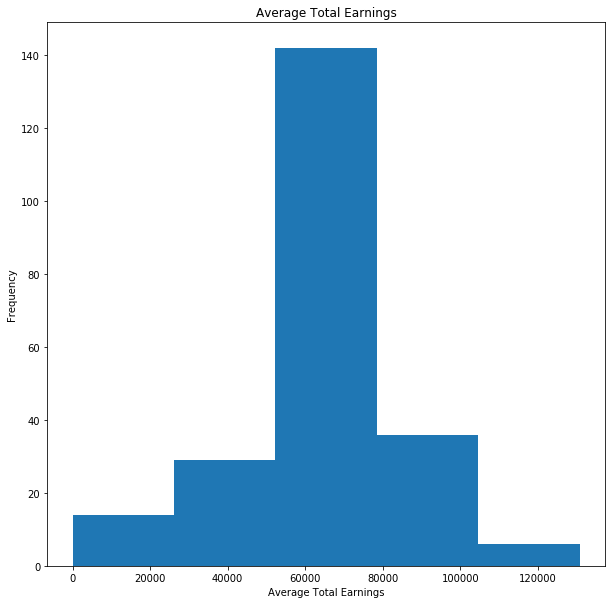

In [72]:
# Plotting the list of the average annual earnings of departments as a histogram

fig,ax= plt.subplots(figsize=(10,10))


plt.hist(avg_total_earnings_list, 5)
plt.xlabel('Average Total Earnings')
plt.ylabel('Frequency')
plt.title('Average Total Earnings')
plt.show()

In [74]:
# using zip() to convert lists to dictionary 
#ref:https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/

dictionary_earnings = dict(zip(department_list, avg_total_earnings_list)) 
print ("Resultant dictionary is : " +  str(dictionary_earnings)) 

Resultant dictionary is : {'Boston Police Department': 130862.41, 'BPS Boston Arts Academy': 64219.94, 'BPS Substitute Teachers/Nurs': 12438.44, 'Tobin K-8': 65123.43, 'Hurley K-8': 61723.08, 'BPS Snowden International Hi': 81610.14, 'King K-8': 56911.93, 'BPS Alternative Education HS': 91735.38, 'BPS Charlestown High': 58574.84, "BPS O'Bryant School": 86149.66, 'English Language Learn': 78695.96, 'BPS Carter Center': 67239.72, 'BPS Transportation': 22668.25, 'BPS Boston Evening Academy': 67884.69, 'HPEC: Com Acd Science & Health': 75767.16, 'BPS Special Education': 59640.56, 'BPS Cl#10 Lee Academy': 60875.1, 'Higginson/Lewis K-8': 57139.19, 'BPS Madison Park High': 67357.37, 'BPS Brighton High': 63266.43, 'BPS Human Resource Team': 73813.7, 'UP "Unlocking Potential" Acad': 46689.8, 'Margarita Muniz Academy': 69349.52, 'BPS Irving Middle': 70581.94, 'BPS Latin Academy': 85647.05, 'BPS Mendell Elementary': 58492.96, 'Edison K-8': 62798.44, 'BPS English High': 71293.43, 'UP Academy Dorch

Looking through the dictionary, there the dataset is pulling a 0 value for "Department Name", so I removed it from the dictionary_earnings in the below:

In [81]:
#ref: https://www.geeksforgeeks.org/python-ways-to-remove-a-key-from-dictionary/


dictionary_earnings.pop("DEPARTMENT_NAME")

0.0

In [83]:
dictionary_earnings

{'Boston Police Department': 130862.41,
 'BPS Boston Arts Academy': 64219.94,
 'BPS Substitute Teachers/Nurs': 12438.44,
 'Tobin K-8': 65123.43,
 'Hurley K-8': 61723.08,
 'BPS Snowden International Hi': 81610.14,
 'King K-8': 56911.93,
 'BPS Alternative Education HS': 91735.38,
 'BPS Charlestown High': 58574.84,
 "BPS O'Bryant School": 86149.66,
 'English Language Learn': 78695.96,
 'BPS Carter Center': 67239.72,
 'BPS Transportation': 22668.25,
 'BPS Boston Evening Academy': 67884.69,
 'HPEC: Com Acd Science & Health': 75767.16,
 'BPS Special Education': 59640.56,
 'BPS Cl#10 Lee Academy': 60875.1,
 'Higginson/Lewis K-8': 57139.19,
 'BPS Madison Park High': 67357.37,
 'BPS Brighton High': 63266.43,
 'BPS Human Resource Team': 73813.7,
 'UP "Unlocking Potential" Acad': 46689.8,
 'Margarita Muniz Academy': 69349.52,
 'BPS Irving Middle': 70581.94,
 'BPS Latin Academy': 85647.05,
 'BPS Mendell Elementary': 58492.96,
 'Edison K-8': 62798.44,
 'BPS English High': 71293.43,
 'UP Academy Dor

In [79]:
dictionary_earnings["Boston City Council"]

38833.51

Using the dictionary, we can see which department has the largest average total earnings, and which department has the least. 

In [75]:
# ref:https://stackoverflow.com/questions/42044090/return-the-maximum-value-from-a-dictionary/42044202

max_value = max(dictionary_earnings.values())
max_keys = [k for k, v in dictionary_earnings.items() if v == max_value] # getting the keys that has the maximum value

print(max_value, max_keys)

130862.41 ['Boston Police Department']


In [84]:
# ref:https://stackoverflow.com/questions/42044090/return-the-maximum-value-from-a-dictionary/42044202

min_value = min(dictionary_earnings.values())
min_keys = [k for k, v in dictionary_earnings.items() if v == min_value]

print(min_value, min_keys)

3020.72 ['HBI Retireeset al']


I will conduct the same process to analyze which department has the largest amount of injury compensation:

In [85]:
department_list2=[]
avg_total_injury_earnings_list=[]

for department in df['DEPARTMENT_NAME'].unique():   #looking for unique values in the column "organization"
    print(department)
    department_list2.append(department)               #added each organization to an empty list so I can create it into a dictionary later
    
    avg_total_injury_earning = round(statistics.mean(df['INJURED'][df['DEPARTMENT_NAME'] == department]),2)
    print(avg_total_injury_earning)
    avg_total_injury_earnings_list.append(avg_total_injury_earning) #added each average salary to an empty list for the dictionary


Boston Police Department
4718.53
BPS Boston Arts Academy
0.0
BPS Substitute Teachers/Nurs
70.71
Tobin K-8
3501.3
Hurley K-8
0.0
BPS Snowden International Hi
358.83
King K-8
12.14
BPS Alternative Education HS
0.0
BPS Charlestown High
0.0
BPS O'Bryant School
59.24
English Language Learn
0.0
BPS Carter Center
168.55
BPS Transportation
62.78
BPS Boston Evening Academy
0.0
HPEC: Com Acd Science & Health
0.0
BPS Special Education
35.44
BPS Cl#10 Lee Academy
0.0
Higginson/Lewis K-8
531.16
BPS Madison Park High
11.98
BPS Brighton High
0.0
BPS Human Resource Team
27.74
UP "Unlocking Potential" Acad
50.81
Margarita Muniz Academy
0.0
BPS Irving Middle
3.33
BPS Latin Academy
0.0
BPS Mendell Elementary
0.0
Edison K-8
20.88
BPS English High
365.1
UP Academy Dorchester
0.0
Curley K-8
102.14
BPS East Boston High
0.0
BPS Facility Management
626.9
BPS Horace Mann
88.53
Mildred Avenue K-8
0.0
BPS Health and Wellness
0.0
BPS Ellis Elementary
701.28
BTU Pilot
0.0
BPS Counseling Service
406.67
BPS Taylor El

In [86]:
#see how many values in each list to make sure they match

values_dept2 = len(department_list2)
print("There are",values_dept2, "departments")
values_earnings2 = len(avg_total_injury_earnings_list)
print("There are", values_earnings2, "average total injury earnings")

There are 227 departments
There are 227 average total injury earnings


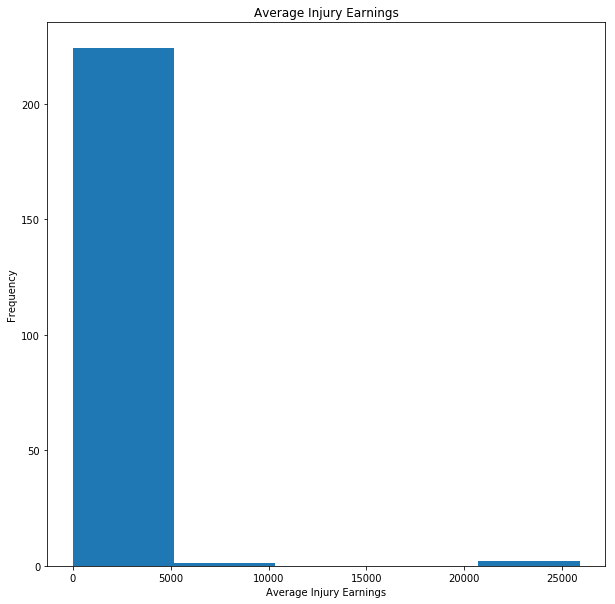

In [87]:
# Plotting the list of the average injury earnings per departments as a histogram

fig,ax= plt.subplots(figsize=(10,10))


plt.hist(avg_total_injury_earnings_list, 5)
plt.xlabel('Average Injury Earnings')
plt.ylabel('Frequency')
plt.title('Average Injury Earnings')
plt.show()

In [89]:
# using zip() to convert lists to dictionary 
#ref:https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/

dictionary_injury = dict(zip(department_list2, avg_total_injury_earnings_list)) 
print ("Resultant dictionary is : " +  str(dictionary_injury)) 

Resultant dictionary is : {'Boston Police Department': 4718.53, 'BPS Boston Arts Academy': 0.0, 'BPS Substitute Teachers/Nurs': 70.71, 'Tobin K-8': 3501.3, 'Hurley K-8': 0.0, 'BPS Snowden International Hi': 358.83, 'King K-8': 12.14, 'BPS Alternative Education HS': 0.0, 'BPS Charlestown High': 0.0, "BPS O'Bryant School": 59.24, 'English Language Learn': 0.0, 'BPS Carter Center': 168.55, 'BPS Transportation': 62.78, 'BPS Boston Evening Academy': 0.0, 'HPEC: Com Acd Science & Health': 0.0, 'BPS Special Education': 35.44, 'BPS Cl#10 Lee Academy': 0.0, 'Higginson/Lewis K-8': 531.16, 'BPS Madison Park High': 11.98, 'BPS Brighton High': 0.0, 'BPS Human Resource Team': 27.74, 'UP "Unlocking Potential" Acad': 50.81, 'Margarita Muniz Academy': 0.0, 'BPS Irving Middle': 3.33, 'BPS Latin Academy': 0.0, 'BPS Mendell Elementary': 0.0, 'Edison K-8': 20.88, 'BPS English High': 365.1, 'UP Academy Dorchester': 0.0, 'Curley K-8': 102.14, 'BPS East Boston High': 0.0, 'BPS Facility Management': 626.9, 'BP

In [91]:
#remove this key and value from the dictionary
dictionary_injury.pop("DEPARTMENT_NAME")

0.0

In [103]:
# ref:https://stackoverflow.com/questions/42044090/return-the-maximum-value-from-a-dictionary/42044202

max_value_injury = max(dictionary_injury.values())
max_keys_injury = [k for k, v in dictionary_injury.items() if v == max_value_injury] # getting the keys that has the maximum value

print(max_value_injury, max_keys_injury)

25909.84 ['BPS Business Service']


In [104]:
# ref:https://stackoverflow.com/questions/42044090/return-the-maximum-value-from-a-dictionary/42044202

min_value_injury = min(dictionary_injury.values())
min_keys_injury = [k for k, v in dictionary_injury.items() if v == min_value_injury]

print(min_value_injury, min_keys_injury)

-13.14 ['Haynes EEC']


As a summary:

In [110]:
print("The department that earned the largest total earnings was", max_keys, "that earned", max_value,"in 2018")

The department that earned the largest total earnings was ['Boston Police Department'] that earned 130862.41 in 2018


In [111]:
print("The department that earned the least total earnings was", min_keys, "that earned", min_value,"in 2018")

The department that earned the least total earnings was ['HBI Retireeset al'] that earned 3020.72 in 2018


In [113]:
print("The department that earned the largest injury earnings was", max_keys_injury, "that earned", max_value_injury,"in 2018")

The department that earned the largest injury earnings was ['BPS Business Service'] that earned 25909.84 in 2018


In [114]:
print("The department that earned the largest injury earnings was", min_keys_injury, "that earned", min_value_injury,"in 2018")

The department that earned the largest injury earnings was ['Haynes EEC'] that earned -13.14 in 2018


It is clear from the above calculations that the Boston Police Departments earns the largest total earnings for 2018 and that BPS Business Services earns the largest injury compensation for 2018. However to test my hypotheses proposed, I will use a one sampled t test to reject the null hypotheses at an alpha level of .05.

"A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features" 

## One Sample T-Test

H0 (null hypothesis): The average salary earned by the Boston City Council is greater than all other city departments, and Boston Public school department earns the least in 2018. 

H1 (alternative hypothesis): Boston City council department doesn't have the largest average salary, and Boston Public school department doesn't have the least average salary. (alpha level at .05)

In [121]:
#ref:https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

tset, pval = ttest_1samp(avg_total_earnings_list,0)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

p-values 1.7305743615884447e-122
 we are rejecting null hypothesis


Using a one sample t-test, because the p-value, the calculated probability of finding true results when the null hypothesis is true, is less than the alpha level of .05, we reject the null hypothesis that Boston City Council average salary earned is greater than all other departments, and that the Boston Public school department earns the least in 2018. 

H0 (null hypothesis): Boston Police Department earns more injury compensation than Boston Fire Department.

H1 (alternative hypothesis): Boston Police department does not earn more injury compensation than Boston Fire Department. (alpha level at .05)

In [124]:
#ref:https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

tset, pval = ttest_1samp(avg_total_injury_earnings_list,0)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

p-values 0.016421803282402118
 we are rejecting null hypothesis


Using a one sample t-test, since the pvalue is less than the alpha level of .05, we reject the null hypothesis that Boston police department earns more injury compensation than Boston Fire Department. 

This data analysis helped me gain more knowledge and experience in exploratory data analysis. The inclusion of hypotheses and hypothesis further extended my knowledge of how testing values and testing hypothesis is crucial to draw conclusions frm datasets. I also gained more knowledge in understanding the importance of cleaning up datasets to conduct successfull data analysis. 